<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

# Инструкция по выполнению проекта

Загрузите и подготовьте данные. Поясните порядок действий.
Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.
Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.
Проведите финальное тестирование.

# Описание данных

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»).

- *RowNumber* — индекс строки в данных
- *CustomerId* — уникальный идентификатор клиента
- *Surname* — фамилия
- *CreditScore* — кредитный рейтинг
- *Geography* — страна проживания
- *Gender* — пол
- *Age* — возраст
- *Tenure* — сколько лет человек является клиентом банка
- *Balance* — баланс на счёте
- *NumOfProducts* — количество продуктов банка, используемых клиентом
- *HasCrCard* — наличие кредитной карты
- *IsActiveMember* — активность клиента
- *EstimatedSalary* — предполагаемая зарплата

**Целевой признак**
- *Exited* — факт ухода клиента

## Подготовка данных

In [4]:
# Здесь мы импортируем необходимые библиотеки для работы с данными и построения моделей.
# Подробно рассмотрим каждую из них:

# 1. pandas - библиотека для работы с табличными данными.
import pandas as pd

# 2. seaborn - библиотека для визуализации данных. Мы будем использовать ее для построения графиков.
import seaborn as sns

# 3. numpy - библиотека для работы с массивами и матрицами чисел.
import numpy as np

# 4. matplotlib.pyplot - библиотека для создания графиков.
import matplotlib.pyplot as plt

# 5. matplotlib.patches - библиотека для создания различных геометрических фигур на графиках.
import matplotlib.patches as mpatches

# 6. time - стандартный модуль Python для работы с временем. Может использоваться для измерения времени выполнения операций.
import time

# 7. warnings - модуль для работы с предупреждениями. Мы можем использовать его, чтобы управлять выводом предупреждений во время выполнения кода.
import warnings

# 8. re - модуль для работы с регулярными выражениями. Это может пригодиться при обработке текстовых данных.
import re

# импортируем модули

# Модуль для отображения tqdm (полосы загрузки)
from tqdm import tqdm

# Модуль для настройки параметров графиков
from pylab import rcParams

# Модуль для разделения данных на тренировочные и тестовые выборки
from sklearn.model_selection import train_test_split

# Модуль для стандартизации данных
from sklearn.preprocessing import StandardScaler

# Модуль для создания модели дерева решений
from sklearn.tree import DecisionTreeClassifier

# Модуль для создания модели случайного леса
from sklearn.ensemble import RandomForestClassifier

# Модуль для оценки моделей
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Модуль для создания модели логистической регрессии
from sklearn.linear_model import LogisticRegression

# Модуль для создания "случайной" модели
from sklearn.dummy import DummyClassifier

# Модуль для создания модели наивного байеса
from sklearn.naive_bayes import GaussianNB

# Модуль для преобразования категориальных признаков
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Модуль для перетасовки данных
from sklearn.utils import shuffle

# Импортируем объект rcParams из библиотеки pylab
from pylab import rcParams

In [5]:
# Выводим информацию о версиях установленных библиотек
!pip show pandas seaborn numpy matplotlib

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost
---
Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /opt/conda/lib/python3.9/site-packages
Requires: numpy, matplotlib, scipy, pandas
Required-by: 
---
Name: numpy
Version: 1.21.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: 
Required-by: xgboost, transformers, thinc, tensorflow-cpu, tensorboard, statsmodels, spacy, seaborn, scipy,

In [6]:
#Настройка отображения рамера графиков
rcParams['figure.figsize'] = 17, 7
# скрываем предупреждения
warnings.filterwarnings('ignore')
# Это целое число, которое не связано с каким-либо конкретным случаем, 
# но в то же время будет фиксировать разбиение на тренировочную и валидационную 
# выборки и порождать одинаковые результаты при повторном запуске кода.
random_state = 123456

In [15]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/Churn.csv'
try:
    data_churn = pd.read_csv('/datasets/Churn.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/Churn.csv'
    data_churn = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'data_churn'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

In [16]:
#Выводим первые 5 строк датафрейма на экран
data_churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [17]:
#Получаю общую информацию о датафрейме
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


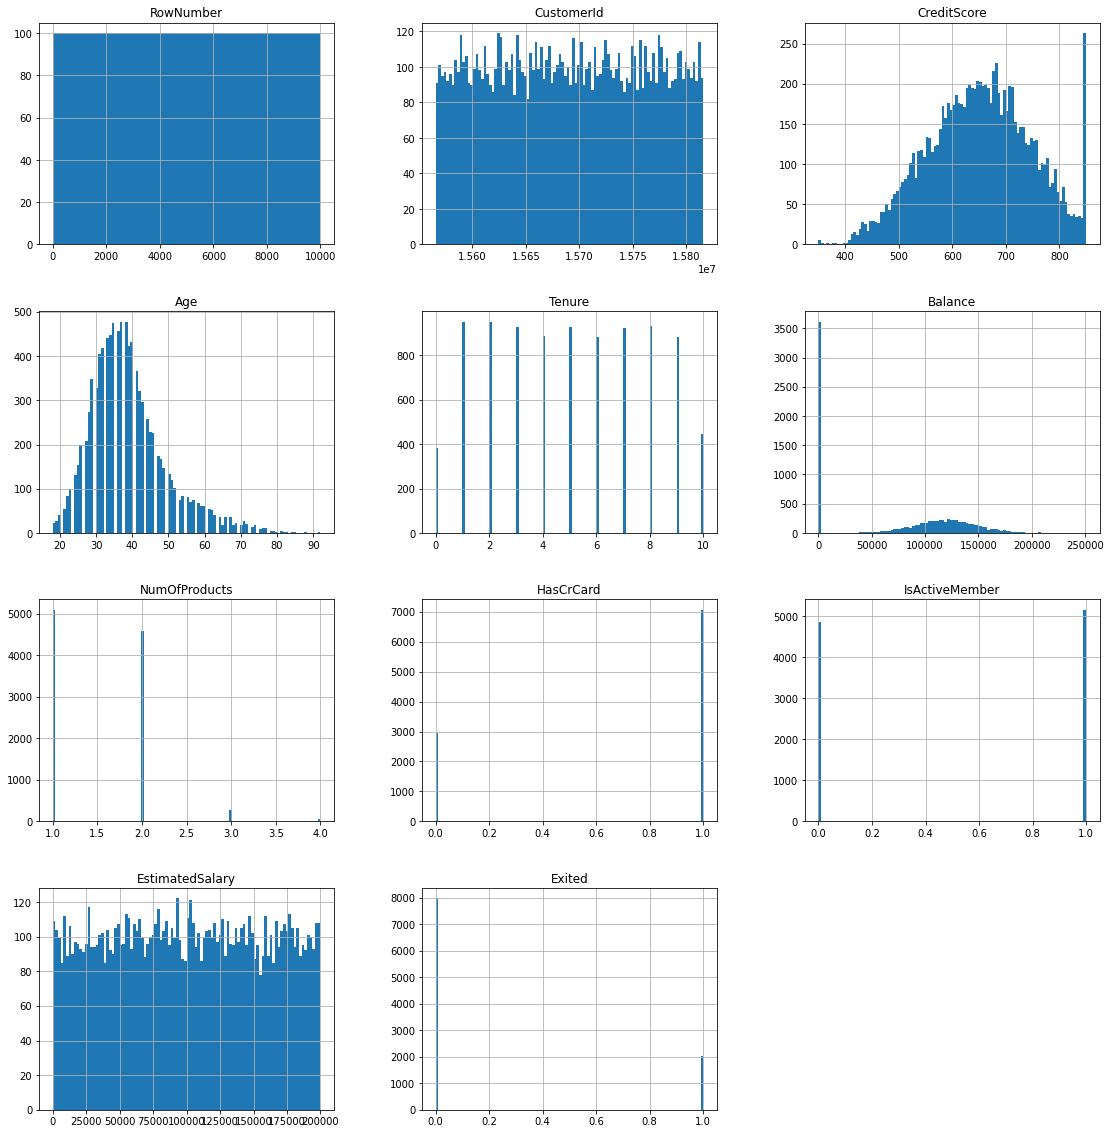

In [18]:
#Построение общей гистограммы для всех числовых столбцов таблицы
data_churn.hist(bins=100, figsize=(19, 20));

In [19]:
# Получаем уникальные значения в столбце где есть пропуски
print(f'Уникальные значения столбца Tenure: {data_churn["Tenure"].unique()}')

Уникальные значения столбца Tenure: [ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


In [20]:
missing_ratio = data_churn['Tenure'].isna().sum() / len(data_churn)
print('Доля пропущенных значений в столбце "tenure": {:.2%}'.format(missing_ratio))

Доля пропущенных значений в столбце "tenure": 9.09%


In [21]:
data_churn.groupby('Geography')['Tenure'].apply(lambda x: x.isna().sum() / len(x) * 100)

Geography
France     9.254089
Germany    8.609008
Spain      9.245055
Name: Tenure, dtype: float64

In [22]:
data_churn.groupby('Exited')['Tenure'].apply(lambda x: x.isna().sum() / len(x) * 100)

Exited
0    9.117167
1    8.983800
Name: Tenure, dtype: float64

В данной таблице содержится информация о 10 тысячах клиентов банка, также в таблице есть 3 вещественных, 3 строковых и 8 целочисленных атрибутов. Некоторые из атрибутов требуют преобразования типов, например, атрибут `Tenure` отражает сколько лет человек является клиентом банка.

В атрибуте `Tenure` есть пропущенные значения (около 9% от общего объема), которые стоит удалить так как процент пропусков не превышает допустимую грань в 10% общепринятой рекомендации и общее распределение по странам примерно равное, что в целом не окажет влияние на анализ. Также можно заметить, что и среди тех кто покинул банк и остался также фактически равное распределение.

Также в таблице есть персональные данные клиентов, такие как идентификатор (`CustomerId`) и фамилия (`Surname`), которые не нужны для анализа и могут быть исключены из рассмотрения. Столбец `RowNumber` повторяет индекс датафрейма и также может быть исключен из анализа.

Названия атрибутов в формате **"CamelCase"** неудобны для работы, поэтому их нужно привести к формату **"snake_case"**.

Также есть смысл привести данные столбцов 'geography' и 'gender' к нижнему регистру.

1. Преобразуем названия столбцов в формат **"snake_case"**, используя функцию `rename()` с применением регулярного выражения re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower() и `метода lower()` для приведения всех букв в нижний регистр;
2. Удалим столбцы `'row_number'`, `'customer_id'` и `'surname'`, которые содержат идентификаторы клиентов и не являются необходимыми для анализа данных;
3. Приведем столбцы `'geography'` и `'gender'` к нижнему регистру с помощью метода `applymap()` и метода `str.lower()`;
4. Удалим все строки где есть пропущенные значения в столбце 'tenure';
5. Преобразуем типы данных столбцов 'balance', 'estimated_salary' и 'tenure' в целочисленный формат.

In [23]:
# Переименовываем столбцы, приводя их к нижнему регистру и заменяя пробелы на подчеркивания
data_churn.rename(columns=lambda x: re.sub(r'(?<!^)(?=[A-Z])', '_', x).lower(), inplace=True)

# Удаляем столбцы 'row_number', 'customer_id', 'surname' из датасета
data_churn = data_churn.drop(['row_number', 'customer_id', 'surname'], axis=1)

# Приводим значения в столбцах 'geography' и 'gender' к нижнему регистру
data_churn[['geography', 'gender']] = data_churn[['geography', 'gender']].applymap(str.lower)

# Удаляем строки с пропущенными значениями в столбце 'tenure'
data_churn = data_churn.dropna(subset=['tenure'])

# Удаляем строки с пропущенными значениями в других столбцах
data_churn.dropna(inplace=True)

# Приводим типы данных в нескольких столбцах к целочисленным значениям
data_churn = data_churn.astype({'balance': 'int32', 
                                'credit_score': 'int16', 
                                'age': 'int8', 
                                'estimated_salary': 'int32', 
                                'tenure': 'int8',
                                'num_of_products': 'int8', 
                                'has_cr_card': 'int8', 
                                'is_active_member': 'int8', 
                                'exited': 'int8'})

# Выводим первые строки датасета для проверки
data_churn.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,france,female,42,2,0,1,1,1,101348,1
1,608,spain,female,41,1,83807,1,0,1,112542,0
2,502,france,female,42,8,159660,3,1,0,113931,1
3,699,france,female,39,1,0,2,0,0,93826,0
4,850,spain,female,43,2,125510,1,1,1,79084,0


In [24]:
#Еще раз получаю общую информацию о датафрейме
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   credit_score      9091 non-null   int16 
 1   geography         9091 non-null   object
 2   gender            9091 non-null   object
 3   age               9091 non-null   int8  
 4   tenure            9091 non-null   int8  
 5   balance           9091 non-null   int32 
 6   num_of_products   9091 non-null   int8  
 7   has_cr_card       9091 non-null   int8  
 8   is_active_member  9091 non-null   int8  
 9   estimated_salary  9091 non-null   int32 
 10  exited            9091 non-null   int8  
dtypes: int16(1), int32(2), int8(6), object(2)
memory usage: 355.1+ KB


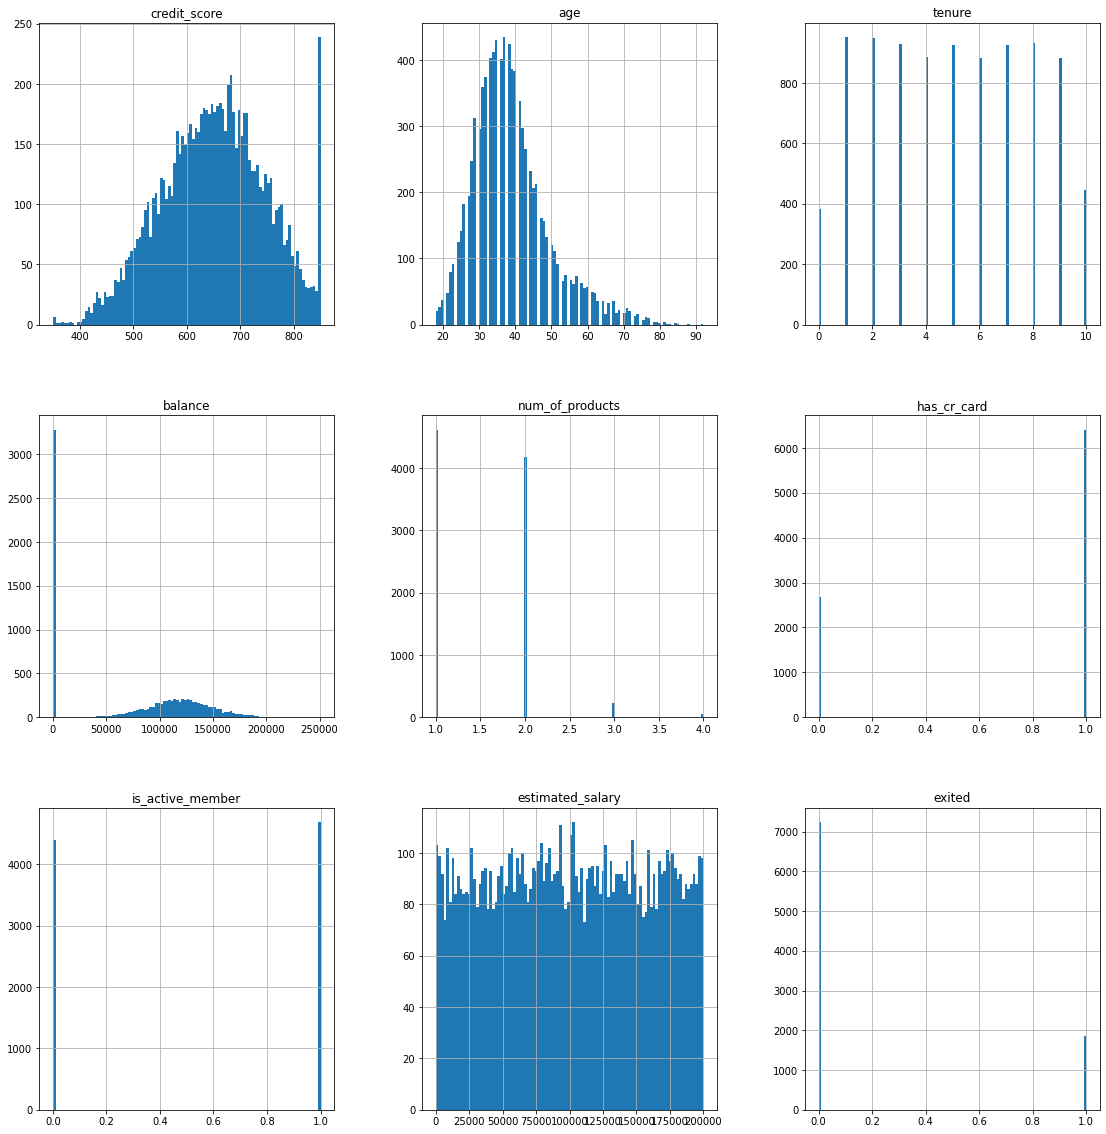

In [25]:
#Построение общей гистограммы для всех числовых столбцов таблицы
data_churn.hist(bins=100, figsize=(19, 20));

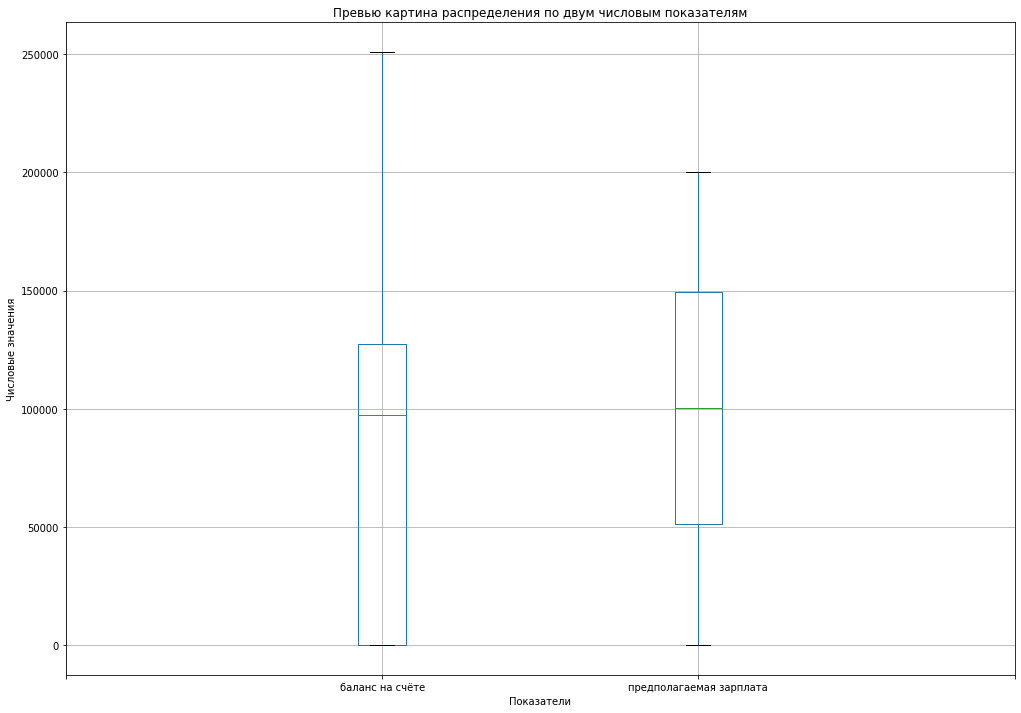

In [27]:
# Построим график "Ящик с усами" для числовых атрибутов баланс на счёте и предполагаемая зарплата.

# Создаем график
fig, ax = plt.subplots(figsize=(17, 12))

# Создаем боксплот для столбцов 'balance' и 'estimated_salary'
data_churn.loc[:, ['balance', 'estimated_salary']].boxplot(ax=ax)

# Создаем подписи для оси X
x_labels = ['', 'баланс на счёте', 'предполагаемая зарплата', '']

# Устанавливаем подписи оси X
plt.xticks(range(len(x_labels)), x_labels)

# Устанавливаем заголовок графика и подписи осей
ax.set(title='Превью картина распределения по двум числовым показателям',
       xlabel='Показатели',
       ylabel='Числовые значения')

# Отображаем график
plt.show()

In [35]:
# Выведем основные статистические характеристики для всех числовых столбцов 
data_churn.describe()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.422616,1.530195,0.704983,0.515565,100180.722253,0.203938
std,96.410471,10.555581,2.894723,62329.309213,0.581003,0.456076,0.499785,57624.753797,0.402946
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.500000,0.000000
50%,652.000000,37.000000,5.000000,97318.000000,1.000000,1.000000,1.000000,100240.000000,0.000000
75%,717.000000,44.000000,7.000000,127561.000000,2.000000,1.000000,1.000000,149566.500000,0.000000
max,850.000000,92.000000,10.000000,250898.000000,4.000000,1.000000,1.000000,199992.000000,1.000000


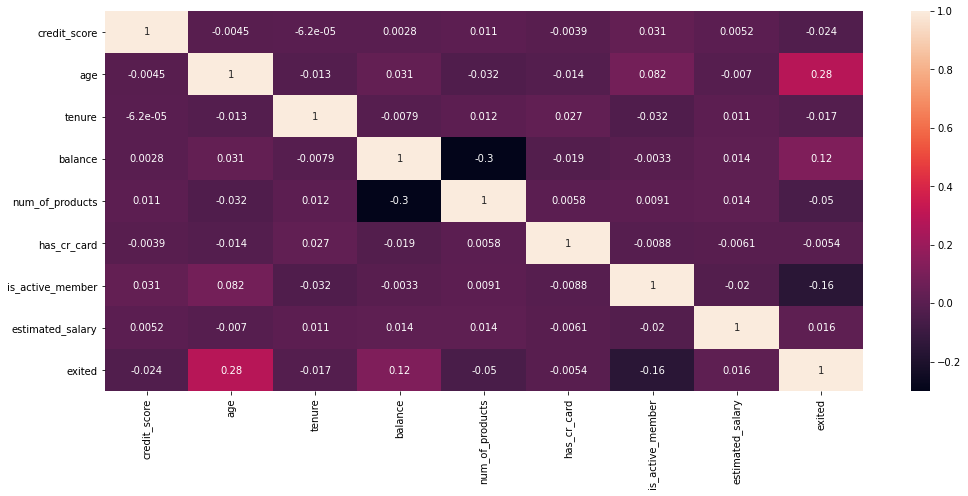

In [36]:
# построим корреляцтионную карту
sns.heatmap(data_churn.corr(), annot=True);

In [37]:
# Расмотрим распределение клиентов в разрезе пола
data_churn['gender'].value_counts(normalize=True)

male      0.547135
female    0.452865
Name: gender, dtype: float64

In [38]:
# Расмотрим распределение клиентов в разрезе наличия кредитной карты
data_churn['has_cr_card'].value_counts(normalize=True)

1    0.704983
0    0.295017
Name: has_cr_card, dtype: float64

In [39]:
# Расмотрим распределение клиентов в разрезе активности
data_churn['is_active_member'].value_counts(normalize=True)

1    0.515565
0    0.484435
Name: is_active_member, dtype: float64

In [40]:
# Расмотрим распределение клиентов в разрезе количества продуктов банка, используемых клиентоми
data_churn['num_of_products'].value_counts(normalize=True)

1    0.507865
2    0.460235
3    0.025740
4    0.006160
Name: num_of_products, dtype: float64

In [41]:
# Расмотрим распределение клиентов в разрезе стран
data_churn.geography.value_counts(normalize=True)

france     0.500495
germany    0.252227
spain      0.247278
Name: geography, dtype: float64

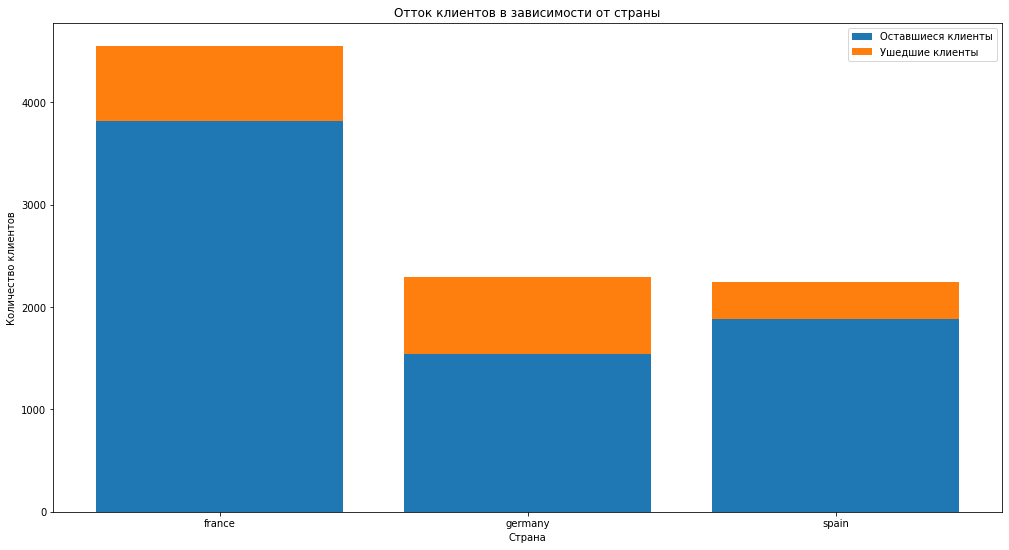

In [42]:
# Рассмотрим на графике как распределены оставшиеся и ушедшие клиенты по странам.

fig, ax = plt.subplots(figsize=(17, 9))

# Группируем данные по странам и целевому признаку, считаем количество записей в каждой группе
counts = data_churn.groupby(['geography', 'exited']).size()

# Разбиваем данные по уровню исхода
exited_counts = counts[:, 1]
not_exited_counts = counts[:, 0]

# Определяем порядок отображения стран на оси X
countries = ['france', 'germany', 'spain']

# Строим столбчатую диаграмму для оставшихся клиентов
ax.bar(countries, not_exited_counts[countries], label='Оставшиеся клиенты')

# Строим столбчатую диаграмму для ушедших клиентов
ax.bar(countries, exited_counts[countries], bottom=not_exited_counts[countries], label='Ушедшие клиенты')

# Настраиваем подписи осей и легенду
ax.set_xlabel('Страна')
ax.set_ylabel('Количество клиентов')
ax.set_title('Отток клиентов в зависимости от страны')
ax.legend()

plt.show()

In [43]:
# вычисляем долю ушедших клиентов в каждой стране
churn_per_geography = data_churn.groupby('geography')['exited'].mean()
churn_per_geography

geography
france     0.161099
germany    0.327519
spain      0.164591
Name: exited, dtype: float64

In [44]:
# Проверить есть ли дубликаты
data_churn.duplicated().sum()

0

(-1.25, 1.25, -1.25, 1.25)

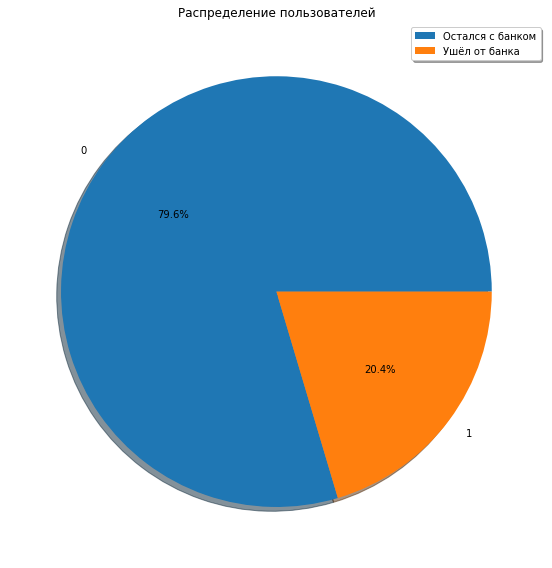

In [46]:
# Создаем круговую диаграмму для распределения значений столбца 'exited'
data_churn.exited.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, figsize=(10,8))

# Создаем легенду для круговой диаграммы, указывая соответствующие подписи для каждого сегмента
plt.legend(["Остался с банком", 'Ушёл от банка'], fontsize=10, shadow=True, facecolor='w')

# Устанавливаем заголовок для графика
plt.title('Распределение пользователей')

# Оптимизируем макет графика и скрываем оси координат
plt.tight_layout()
plt.axis('off')

# Вывод

После ознакомления с данными можно сделать следующие выводы:

1. В выборке представлены клиенты, где 79.6% остались с банком, а 20.4% ушли. Это говорит о несбалансированности данных;
2. Пропущенные значения относятся к столбцу Tenure, который показывает, сколько лет клиент является клиентом банка. Так как этот показатель является достаточно индивидуальным, решено удалить пропуски в нем, вместо заполнения значений медианой, модой или средним;
3. Большинство клиентов банка в выборке живут во Франции (50%), некоторые в Германии (25%) и Испании (25%);
4. Признаки в столбцах RowNumber, CustomerId и Surname не несут никакой полезной информации для наших будущих моделей, поэтому мы их удалим;
5. Клиенты могут иметь не более 4 продуктов от банка;
6. Распределение оценок в столбце CreditScore различается в зависимости от клиентов, но в среднем клиенты имеют хорошую оценку.

## Исследование задачи

**Оценка сбалансированности целевых классов**

Оценим соотношения классов в целевом признаке.

In [47]:
# Используем метод value_counts для подсчета уникальных значений в столбце 'exited' 
# и нормализуем результаты, чтобы получить доли вместо абсолютных значений
exited_distribution = data_churn['exited'].value_counts(normalize=True)

# Выводим полученное распределение пользователей
exited_distribution

0    0.796062
1    0.203938
Name: exited, dtype: float64

Распределение классов довольно неравномерное, что может повлиять на качество моделирования. Например, модель, которая будет предсказывать только класс 0, достигнет точности около 80%, но не будет предсказывать класс 1 вообще. Поэтому, возможно, потребуется балансировка классов или использование метрик оценки качества, учитывающих дисбаланс классов.

Конвертируем категориальные признаки в числовые

In [48]:
# Применяем One-Hot Encoding к датафрейму data_churn, заменяя категориальные признаки на бинарные
ohe_data_churna = pd.get_dummies(data_churn, drop_first=True)

# Выводим информацию о датафрейме ohe_data_churna
ohe_data_churna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   credit_score       9091 non-null   int16
 1   age                9091 non-null   int8 
 2   tenure             9091 non-null   int8 
 3   balance            9091 non-null   int32
 4   num_of_products    9091 non-null   int8 
 5   has_cr_card        9091 non-null   int8 
 6   is_active_member   9091 non-null   int8 
 7   estimated_salary   9091 non-null   int32
 8   exited             9091 non-null   int8 
 9   geography_germany  9091 non-null   uint8
 10  geography_spain    9091 non-null   uint8
 11  gender_male        9091 non-null   uint8
dtypes: int16(1), int32(2), int8(6), uint8(3)
memory usage: 239.7 KB


In [49]:
# Выводим первые несколько строк нового DataFrame для оценки результата
ohe_data_churna.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


В данной задаче классы целевого признака несбалансированы, причем доля положительного класса (ушедшие клиенты) составляет 20%. Чтобы учесть дисбаланс классов, мы проведем обучение моделей в несколько этапов.

1. Сформируем обучающую и тестовую выборки, а также рассмотрим различные варианты подготовки обучающих признаков.

2. Для выбранных моделей (логистическая регрессия, решающее дерево, случайный лес и Gaussian Naive Bayes) мы проведем обучение с перебором гиперпараметров на каждом из подготовленных наборов обучающих признаков. Затем мы оценим полученные результаты, смотря на значения метрик на тестовом наборе данных.

3. Применим различные подходы для устранения дисбаланса классов и повторно проведем обучение моделей, показавших наилучшие результаты на предыдущем этапе обучения.

Разобьем данные на три части - обучающую, валидационную и тестовую выборки, мы будем использовать принцип стратифицированной рандомизации.
Мы будем использовать соотношение 3:1:1 для разбиения данных. Сначала мы выделим тестовую выборку (`test`), затем валидационную (`valid`), а оставшиеся данные будут использованы для обучения модели (`train`). Это означает, что наша модель будет обучаться на 60% данных, валидироваться на 20% данных и тестироваться на оставшихся 20% данных.

In [54]:
# Функция `split_data` принимает на вход следующие параметры:
# - data: DataFrame с данными
# - target_column: название столбца, содержащего целевую переменную
# - random_state: зерно для случайной генерации, чтобы получить одинаковые результаты при повторном запуске

def split_data(data, target_column, random_state):
    # Выделяем целевую переменную и признаки
    target = data[target_column]
    features = data.drop(target_column, axis=1)

    # Задаем размеры для тренировочной, валидационной и тестовой выборок
    train_size = 0.6
    valid_size = 0.2
    test_size = 0.2

    # Разбиваем данные на обучающую, валидационную и тестовую выборки
    features_train, features_valid_test, target_train, target_valid_test = train_test_split(
        features, target, train_size=train_size, random_state=random_state)
    
    features_valid, features_test, target_valid, target_test = train_test_split(
        features_valid_test, target_valid_test, test_size=test_size/(valid_size+test_size), random_state=random_state)

    # Выводим размеры полученных выборок
    print('Размер обучающей выборки:', features_train.shape[0])
    print('Размер валидационной выборки:', features_valid.shape[0])
    print('Размер тестовой выборки:', features_test.shape[0])

    # Возвращаем разделенные выборки
    return features_train, features_valid, features_test, target_train, target_valid, target_test

In [55]:
# Вызываем функцию `split_data` с соответствующими параметрами:
# - `ohe_data_churna` - исходные данные
# - `'exited'` - название столбца с целевой переменной
# - `random_state` - зерно для случайной генерации
features_train, features_valid, features_test, target_train, target_valid, target_test = split_data(ohe_data_churna, 
                                                                                                'exited', 
                                                                                                random_state)

Размер обучающей выборки: 5454
Размер валидационной выборки: 1818
Размер тестовой выборки: 1819


In [59]:
# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование обучающей выборки
scaled_features_train = pd.DataFrame(scaler.fit_transform(features_train), columns=features_train.columns)

# Применение масштабирования к валидационной и тестовой выборкам
scaled_features_valid = pd.DataFrame(scaler.transform(features_valid), columns=features_valid.columns)
scaled_features_test = pd.DataFrame(scaler.transform(features_test), columns=features_test.columns)

In [60]:
# Вызываем метод 'value_counts()' для столбца 'exited' в DataFrame 'ohe_data_churna'
# Этот метод подсчитывает количество каждого уникального значения в столбце
ohe_data_churna['exited'].value_counts()


0    7237
1    1854
Name: exited, dtype: int64

Так как соотношение классов 1:4. Изучим модели без исправление баланса.

# Решающее дерево

Начнем с решающего дерева. Проведем исследование при разном значении max_depth.

100%|██████████| 30/30 [00:00<00:00, 32.66it/s]


Лучший результат: глубина дерева = 7 , F1-мера = 0.5824345146379044
Пройденное время: 0.9219026565551758 секунды


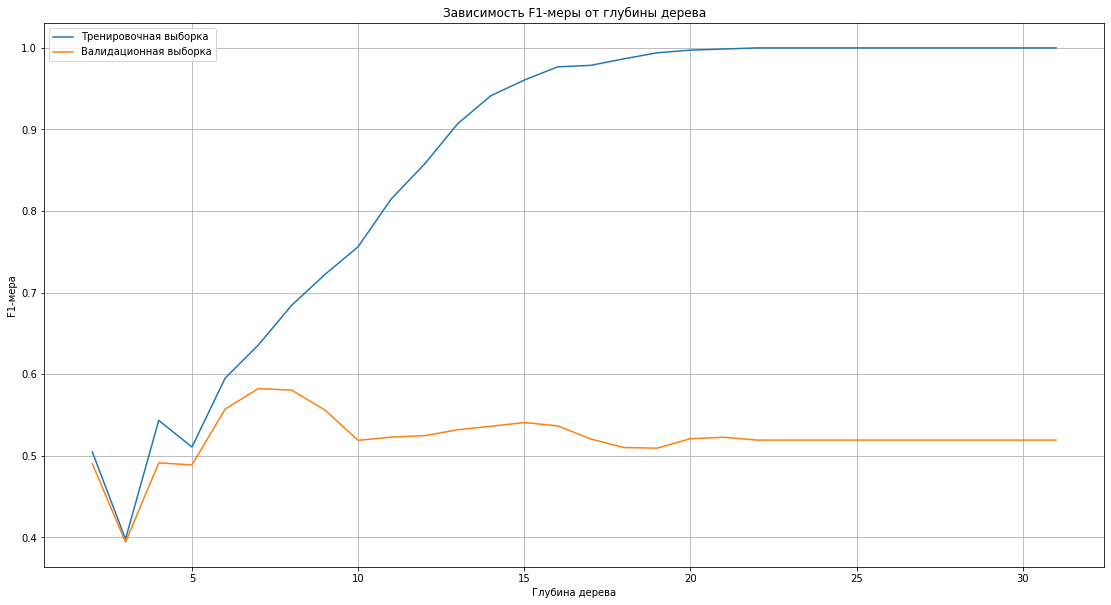

CPU times: user 1.12 s, sys: 24.7 ms, total: 1.14 s
Wall time: 1.15 s


In [61]:
%%time

# Замеряем время выполнения кода
start_time = time.time()

best_depth = 0  # Лучшая глубина дерева
best_f1 = 0  # Лучшее значение F1-меры
train_scores = []  # Список для хранения F1-меры на тренировочной выборке
valid_scores = []  # Список для хранения F1-меры на валидационной выборке

# Итерируемся по значениям глубины дерева от 2 до 31 (включительно)
for depth in tqdm(range(2, 32)):
    # Создаем модель DecisionTreeClassifier с текущей глубиной и фиксированным random_state
    model = DecisionTreeClassifier(random_state=random_state, max_depth=depth)
    
    # Обучаем модель на тренировочной выборке
    model.fit(scaled_features_train, target_train)
    
    # Делаем предсказания на тренировочной и валидационной выборках
    predicted_train = model.predict(scaled_features_train)
    predicted_valid = model.predict(scaled_features_valid)
    
    # Вычисляем F1-меру для тренировочной и валидационной выборок
    f1_train = f1_score(target_train, predicted_train)
    f1_valid = f1_score(target_valid, predicted_valid)
    
    # Добавляем полученные значения F1-меры в соответствующие списки
    train_scores.append(f1_train)
    valid_scores.append(f1_valid)
    
    # Проверяем, является ли текущее значение F1-меры на валидационной выборке лучшим
    if f1_valid > best_f1:
        best_f1 = f1_valid
        best_depth = depth

# Выводим наилучшую глубину и соответствующее ей значение F1-меры
print("Лучший результат: глубина дерева =", best_depth, ", F1-мера =", best_f1)

# Выводим время выполнения кода
print("Пройденное время:", time.time() - start_time, "секунды")

# Построение графика зависимости F1-меры от глубины дерева
plt.figure(figsize=[19, 10])
plt.plot(range(2, 32), train_scores, label='Тренировочная выборка')
plt.plot(range(2, 32), valid_scores, label='Валидационная выборка')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от глубины дерева')
plt.legend()
plt.grid(True)
plt.show()

Лучший реультат был достигнут на глубине 7.

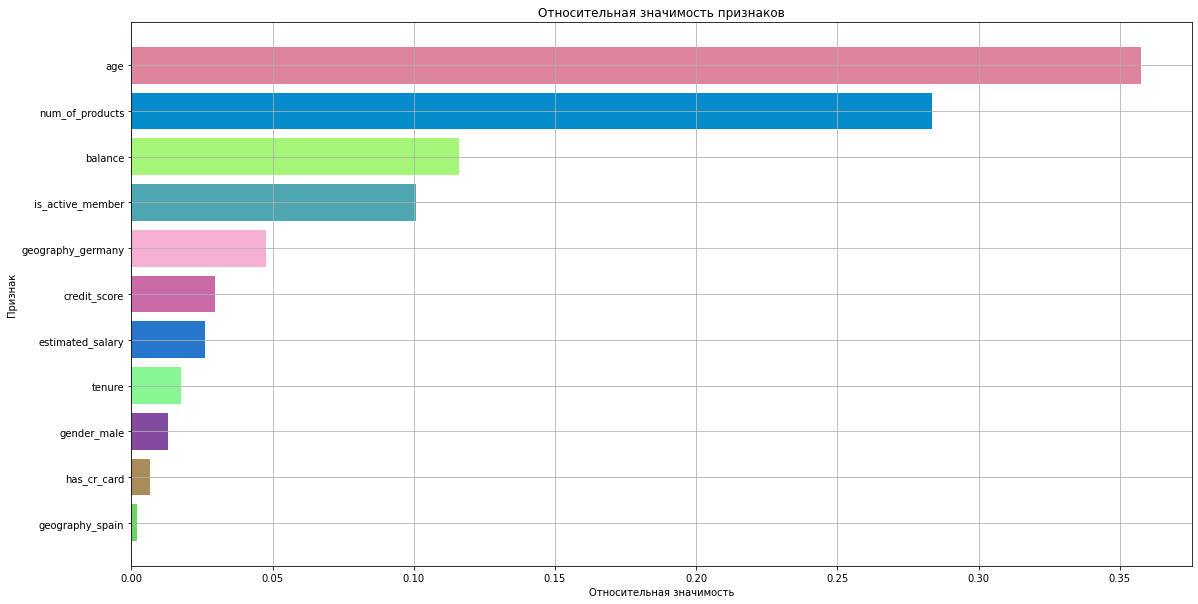

In [62]:
# Обучение модели
model = DecisionTreeClassifier(random_state=random_state, max_depth=7)
model.fit(scaled_features_train, target_train)

# Получение списка названий признаков
feature_names = scaled_features_train.columns

# Получение относительной значимости признаков
importances = model.feature_importances_

# Сортировка индексов по значимости признаков
sorted_indices = np.argsort(importances)

# Генерация случайных цветов для каждого столбца
colors = np.random.rand(len(importances), 3)

# Отображение графика значимости признаков (отсортированного) с измененными цветами
plt.figure(figsize=[19, 10])
plt.barh(range(len(importances)), importances[sorted_indices], color=colors)
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Относительная значимость')
plt.ylabel('Признак')
plt.title('Относительная значимость признаков')
plt.grid(True)
plt.show()


Следует отметить, что наиболее значимыми признаками модели оказались:
- возраст
- количество продуктов банка, используемых клиентом
- баланс
- активность клиента
- клиент житель Германии

# Cлучайный лес

Рассмотрим, как себя ведет случайный лес. И проведем исследование на разное количество деревьев.

100%|██████████| 14/14 [00:08<00:00,  1.62it/s]


Лучшее значение F1-меры: 0.5632 при числе деревьев: 100
Пройденное время: 8.667668104171753 секунды


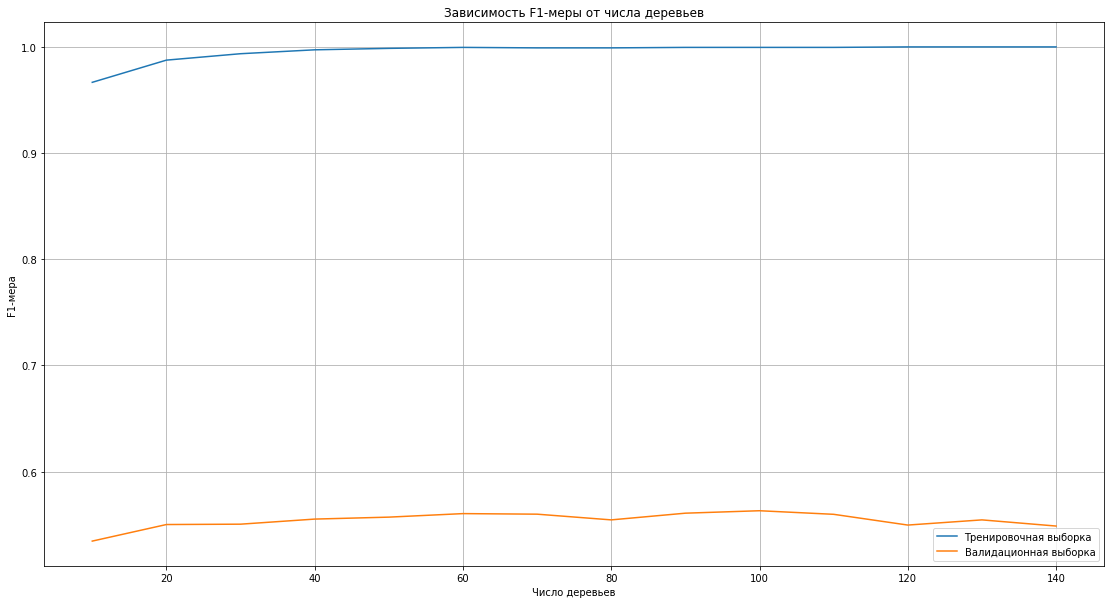

CPU times: user 8.71 s, sys: 22.2 ms, total: 8.74 s
Wall time: 8.91 s


In [63]:
%%time

start_time = time.time()

best_f1 = 0
best_estimators = 0
train_scores = []
valid_scores = []

# Мы циклично обучаем модели RandomForestClassifier с разным числом деревьев (estimators) 
# в диапазоне от 10 до 150 с шагом 10.
for estim in tqdm(range(10, 150, 10)):
    model = RandomForestClassifier(n_estimators=estim, random_state=random_state)
    model.fit(scaled_features_train, target_train)  # Обучение модели на тренировочных данных
    predicted_train = model.predict(scaled_features_train)  # Предсказания на тренировочных данных
    predicted_valid = model.predict(scaled_features_valid)  # Предсказания на валидационных данных
    f1_train = f1_score(target_train, predicted_train)  # Рассчет F1-меры на тренировочных данных
    f1_valid = f1_score(target_valid, predicted_valid)  # Рассчет F1-меры на валидационных данных
    train_scores.append(f1_train)  # Сохранение F1-меры на тренировочных данных
    valid_scores.append(f1_valid)  # Сохранение F1-меры на валидационных данных
    
    if f1_valid > best_f1:
        best_f1 = f1_valid
        best_estimators = estim

print(f"Лучшее значение F1-меры: {best_f1:.4f} при числе деревьев: {best_estimators}")
print("Пройденное время:", time.time() - start_time, "секунды")

# Построение графика
plt.figure(figsize=[19, 10])
plt.plot(range(10, 150, 10), train_scores, label='Тренировочная выборка')
plt.plot(range(10, 150, 10), valid_scores, label='Валидационная выборка')
plt.xlabel('Число деревьев')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от числа деревьев')
plt.legend()
plt.grid(True)
plt.show()

Лучший результат был получен при числе деревьев: 100. Сделаем исследование с шагом 1.

100%|██████████| 140/140 [01:29<00:00,  1.56it/s]


Лучшее значение F1-меры: 0.5719 при числе деревьев: 33
Пройденное время: 89.66297054290771 секунды


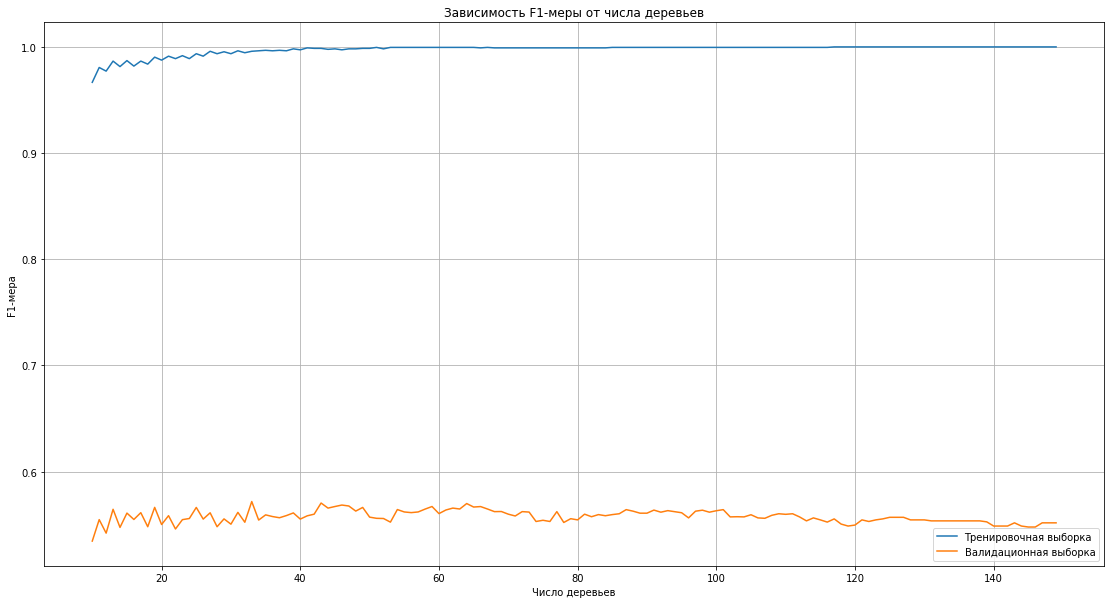

CPU times: user 1min 29s, sys: 357 ms, total: 1min 29s
Wall time: 1min 29s


In [65]:
%%time

start_time = time.time()

best_f1 = 0
best_estimators = 0
train_scores = []
valid_scores = []

# Мы циклично обучаем модели RandomForestClassifier с разным числом деревьев (estimators) 
# в диапазоне от 10 до 150 с шагом 1 (теперь шаг 1).
for estim in tqdm(range(10, 150, 1)):
    model = RandomForestClassifier(n_estimators=estim, random_state=random_state)
    model.fit(scaled_features_train, target_train)  # Обучение модели на тренировочных данных
    predicted_train = model.predict(scaled_features_train)  # Предсказания на тренировочных данных
    predicted_valid = model.predict(scaled_features_valid)  # Предсказания на валидационных данных
    f1_train = f1_score(target_train, predicted_train)  # Рассчет F1-меры на тренировочных данных
    f1_valid = f1_score(target_valid, predicted_valid)  # Рассчет F1-меры на валидационных данных
    train_scores.append(f1_train)  # Сохранение F1-меры на тренировочных данных
    valid_scores.append(f1_valid)  # Сохранение F1-меры на валидационных данных
    
    if f1_valid > best_f1:
        best_f1 = f1_valid
        best_estimators = estim

print(f"Лучшее значение F1-меры: {best_f1:.4f} при числе деревьев: {best_estimators}")
print("Пройденное время:", time.time() - start_time, "секунды")

# Построение графика
plt.figure(figsize=[19, 10])
plt.plot(range(10, 150, 1), train_scores, label='Тренировочная выборка')
plt.plot(range(10, 150, 1), valid_scores, label='Валидационная выборка')
plt.xlabel ('Число деревьев')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от числа деревьев')
plt.legend()
plt.grid(True)
plt.show()

Мы обучили модель случайного леса и получили F1-меру на валидационной выборке равную 0.5719 при 33 деревьях. Это означает, что наша модель правильно определяет 57% истинных положительных и отрицательных результатов.

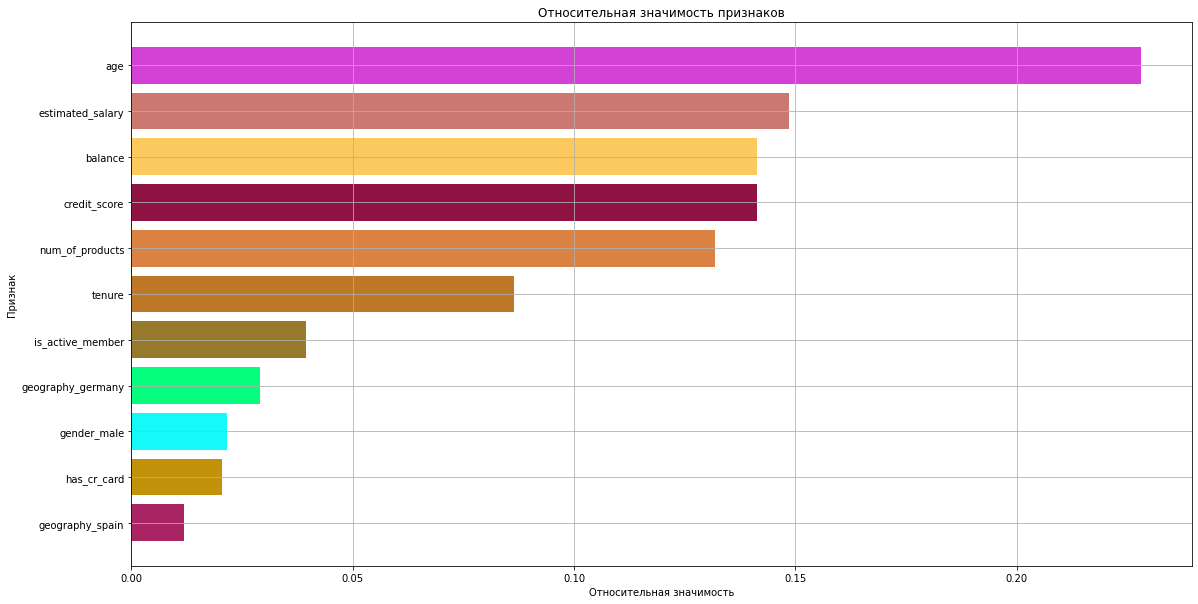

In [66]:
# Обучение модели
model = RandomForestClassifier(random_state=random_state, n_estimators=33)
model.fit(scaled_features_train, target_train)

# Получение списка названий признаков
feature_names = scaled_features_train.columns

# Получение относительной значимости признаков
importances = model.feature_importances_

# Сортировка индексов по значимости признаков
sorted_indices = np.argsort(importances)

# Генерация случайных цветов для каждого столбца
colors = np.random.rand(len(importances), 3)

# Отображение графика значимости признаков (отсортированного) с измененными цветами
plt.figure(figsize=[19, 10])
plt.barh(range(len(importances)), importances[sorted_indices], color=colors)
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Относительная значимость')
plt.ylabel('Признак')
plt.title('Относительная значимость признаков')
plt.grid(True)
plt.show()

Следует отметить, что наиболее значимыми признаками модели оказались:
- возраст
- предполагаемая зарплата
- баланс на счёте
- кредитный рейтинг
- количество продуктов банка, используемых клиентом
- сколько лет человек является клиентом банка

# Логистическая регрессия

Исследуем, как работает Логистическая регрессия на этих данных.

In [72]:
%%time

start_time = time.time()  # Засекаем время старта выполнения кода

best_f1 = 0  # Переменная для хранения лучшей F1-меры
best_C = 0   # Переменная для хранения лучшего значения параметра C
best_max_iter = 0  # Переменная для хранения лучшего значения параметра max_iter

# Используем два вложенных цикла: первый для параметра C, второй для параметра max_iter.
for c in tqdm(range(1, 101)):  # Итерируемся по значениям от 1 до 100 для параметра C
    for max_iter in range(1, 30, 1):  # Итерируемся по значениям от 1 до 30 с шагом 1 для параметра max_iter
        model = LogisticRegression(random_state=random_state, solver='liblinear', max_iter=max_iter, C=c/10)
        # Создаем модель LogisticRegression с текущими значениями C и max_iter и задаем solver для оптимизации

        model.fit(scaled_features_train, target_train)  # Обучаем модель на стандартизированных тренировочных данных
        predicted_valid = model.predict(scaled_features_valid)  # Делаем предсказания на валидационных данных
        f1 = f1_score(target_valid, predicted_valid)  # Рассчитываем F1-меру на валидационных данных

        if f1 > best_f1:  # Если текущее значение F1-меры превосходит лучшее найденное значение
            best_f1 = f1  # Обновляем лучшее значение F1-меры
            best_C = c/10  # Обновляем лучшее значение параметра C
            best_max_iter = max_iter  # Обновляем лучшее значение параметра max_iter

# По окончании всех итераций выводим лучшее значение F1-меры и значения параметров C и max_iter, на которых оно достигнуто
print(f"Лучшее значение F1-меры: {best_f1:.4f} при параметре C: {best_C}, max_iter: {best_max_iter}")

print("Пройденное время:", time.time() - start_time, "секунды")  # Выводим время, затраченное на выполнение кода


100%|██████████| 100/100 [05:35<00:00,  3.35s/it]

Лучшее значение F1-меры: 0.2834 при параметре C: 0.1, max_iter: 4
Пройденное время: 335.0198085308075 секунды
CPU times: user 2min 37s, sys: 2min 56s, total: 5min 34s
Wall time: 5min 35s


Лучшее значение F1-меры равно  0.2834 при параметре C: 0.1, max_iter: 4. Данное значение не является удовлетворительным, что может указывать на недостаточную информативность признаков или необходимость использования другой модели для решения задачи.

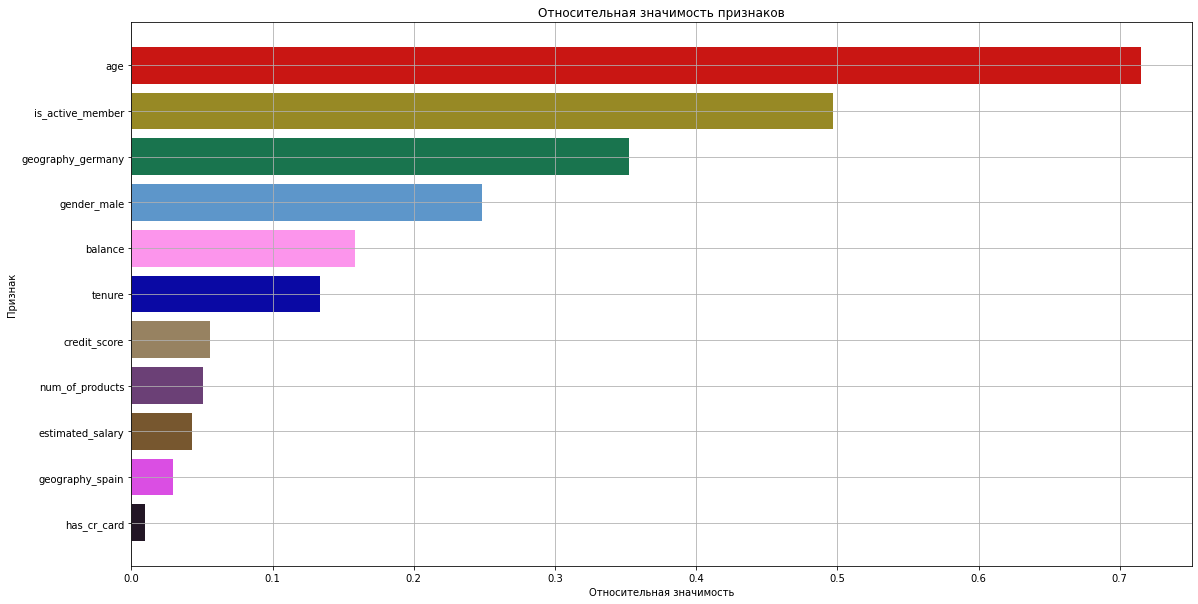

In [73]:
# Обучение модели
model = LogisticRegression(random_state=random_state, solver='liblinear', C=0.1, max_iter=4)
model.fit(scaled_features_train, target_train)

# Получение списка названий признаков
feature_names = features_train.columns

# Получение абсолютных значений коэффициентов и их соответствующих индексов
coef_abs = abs(model.coef_[0])
indices = range(len(coef_abs))

# Сортировка индексов по абсолютным значениям коэффициентов
sorted_indices = sorted(indices, key=lambda x: coef_abs[x], reverse=False)

# Генерация случайных цветов для каждого столбца
colors = np.random.rand(len(indices), 3)

# Отображение графика значимости признаков (отсортированного) с измененными цветами
plt.figure(figsize=[19,10])
plt.barh(indices, coef_abs[sorted_indices], color=colors)
plt.yticks(indices, [feature_names[i] for i in sorted_indices])
plt.xlabel('Относительная значимость')
plt.ylabel('Признак')
plt.title('Относительная значимость признаков')
plt.grid(True)
plt.show()


Следует отметить, что наиболее значимыми признаками модели оказались:
- возраст
- активность клиента
- клиент житель Германии
- пол
- баланс на счёте
- сколько лет человек является клиентом банка

# Гауссовская наивная байесовская модель

Исследуем, как работает Гауссовская наивная байесовская модель.

In [75]:
%%time

start_time = time.time()  # Засекаем время старта выполнения кода

best_f1 = 0  # Переменная для хранения лучшей F1-меры
best_var_smoothing = 0  # Переменная для хранения лучшего значения параметра var_smoothing

# Итерируемся по значениям параметра var_smoothing, которые берутся из логарифмической шкалы в диапазоне от 10^-10 до 1.
for var_smoothing in tqdm(np.logspace(-10, 0, num=1000)):  # Генерируем 1000 значений в указанном диапазоне
    model = GaussianNB(var_smoothing=var_smoothing)  # Создаем модель GaussianNB с текущим значением var_smoothing
    model.fit(scaled_features_train, target_train)  # Обучаем модель на стандартизированных тренировочных данных
    predicted_valid = model.predict(scaled_features_valid)  # Делаем предсказания на валидационных данных
    f1 = f1_score(target_valid, predicted_valid)  # Рассчитываем F1-меру на валидационных данных

    if f1 > best_f1:  # Если текущее значение F1-меры превосходит лучшее найденное значение
        best_f1 = f1  # Обновляем лучшее значение F1-меры
        best_var_smoothing = var_smoothing  # Обновляем лучшее значение параметра var_smoothing

# По окончании всех итераций выводим лучшее значение F1-меры и значение параметра var_smoothing, на котором оно достигнуто
print(f"Лучшее значение F1-меры: {best_f1:.4f} при параметре var_smoothing: {best_var_smoothing:.2E}")

print("Пройденное время:", time.time() - start_time, "секунды")  # Выводим время, затраченное на выполнение кода


100%|██████████| 1000/1000 [00:06<00:00, 151.91it/s]

Лучшее значение F1-меры: 0.4429 при параметре var_smoothing: 1.00E-10
Пройденное время: 6.586874723434448 секунды
CPU times: user 6.44 s, sys: 27 ms, total: 6.47 s
Wall time: 6.59 s


Результаты модели GaussianNB показали F1-меру в 0.4429 при наилучшем значении гиперпараметра var_smoothing, что лучше, чем результаты, полученные с помощью логистической регрессии, однако все же недостаточно высокий для решения поставленной задачи.

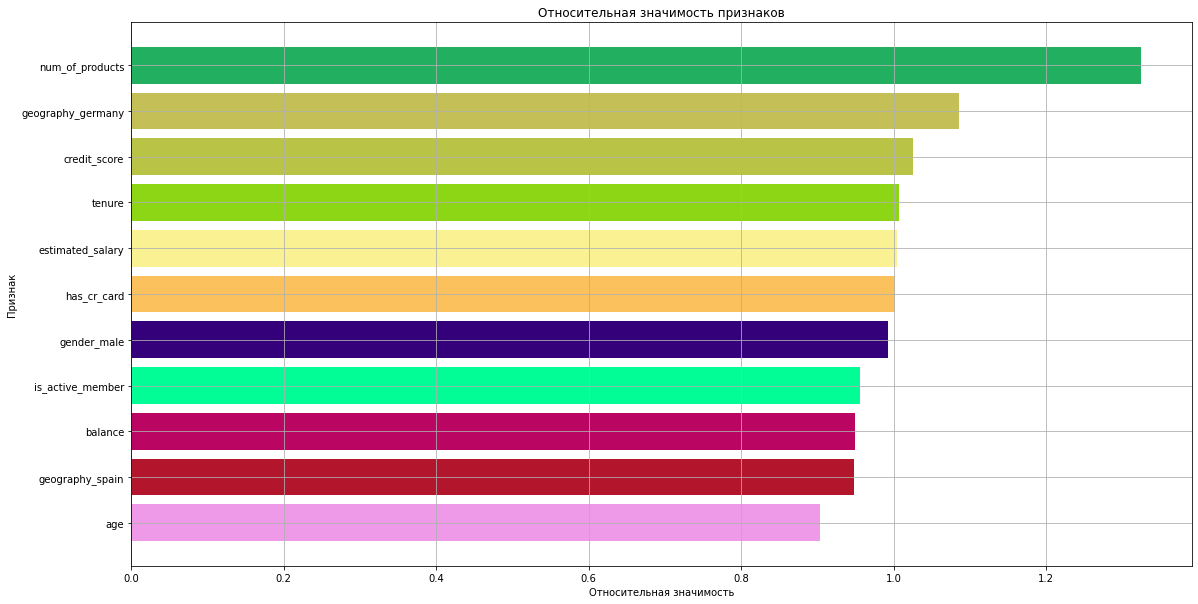

In [76]:
# Обучение модели
model = GaussianNB(var_smoothing=1.00E-10)
model.fit(scaled_features_train, target_train)

# Получение списка названий признаков
feature_names = features_train.columns

# Получение дисперсий для каждого признака
variances = model.sigma_

# Вычисление относительной значимости признаков
importances = variances.mean(axis=0)

# Сортировка индексов по значимости признаков
sorted_indices = np.argsort(importances)

# Генерация случайных цветов для каждого столбца
colors = np.random.rand(len(importances), 3)

# Отображение графика значимости признаков (отсортированного) с измененными цветами
plt.figure(figsize=[19, 10])
plt.barh(range(len(importances)), importances[sorted_indices], color=colors)
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Относительная значимость')
plt.ylabel('Признак')
plt.title('Относительная значимость признаков')
plt.grid(True)
plt.show()


Следует отметить, что наиболее значимыми признаками модели оказались:

- количество продуктов банка, используемых клиентом
- клиент житель Германии
- кредитный рейтинг
- сколько лет человек является клиентом банка
- предполагаемая зарплата
- наличие кредитной карты
- пол
- активность клиента
- баланс
- клиент житель Испании
- возраст

Произведем анализ точности (accuracy), точности предсказания (precision), полноты (recall) и F-метрики.

In [77]:
%%time

# Определение списка моделей с их параметрами
models = [('Решающее дерево', DecisionTreeClassifier(random_state=random_state, max_depth=7)),
          ('Случайный лес', RandomForestClassifier(random_state=random_state, n_estimators=33)),
          ('Логистическая регрессия', LogisticRegression(random_state=random_state, solver='liblinear', C=0.1, max_iter=4)),
          ('Гауссовская байесовская модель', GaussianNB(var_smoothing=1.00E-10))
         ]

# Итерируемся по каждой модели
for model_name, model in models:
    model.fit(scaled_features_train, target_train)  # Обучаем модель на стандартизированных тренировочных данных
    predicted_valid = model.predict(scaled_features_valid)  # Делаем предсказания на валидационных данных
    predicted_prob_valid = model.predict_proba(scaled_features_valid)[:, 1]  # Вероятности класса 1 для AUC-ROC
    
    # Выводим результаты метрик для каждой модели
    print(model_name)
    print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
    print('Precision:', precision_score(target_valid, predicted_valid))
    print('Recall:', recall_score(target_valid, predicted_valid))
    print('F1:', f1_score(target_valid, predicted_valid))
    print('AUC-ROC:', roc_auc_score(target_valid, predicted_prob_valid))
    print()

Решающее дерево
Точность попадания по классам: 0.8509350935093509
Precision: 0.7052238805970149
Recall: 0.49606299212598426
F1: 0.5824345146379044
AUC-ROC: 0.8323150629135867

Случайный лес
Точность попадания по классам: 0.8542354235423543
Precision: 0.7436974789915967
Recall: 0.4645669291338583
F1: 0.5718901453957996
AUC-ROC: 0.837666690411089

Логистическая регрессия
Точность попадания по классам: 0.8025302530253026
Precision: 0.5916666666666667
Recall: 0.18635170603674542
F1: 0.2834331337325349
AUC-ROC: 0.7707311638237289

Гауссовская байесовская модель
Точность попадания по классам: 0.8201320132013201
Precision: 0.6310679611650486
Recall: 0.34120734908136485
F1: 0.44293015332197616
AUC-ROC: 0.7944993305899394

CPU times: user 396 ms, sys: 108 ms, total: 505 ms
Wall time: 503 ms


Проведем построение ROC-кривой для кажддой модели. И выведем показатель AUC-ROC.

AUC-ROC Решающее дерево: 0.83
AUC-ROC Случайный лес: 0.84
AUC-ROC Логистическая регрессия: 0.77
AUC-ROC Гауссовская байесовская модель: 0.79


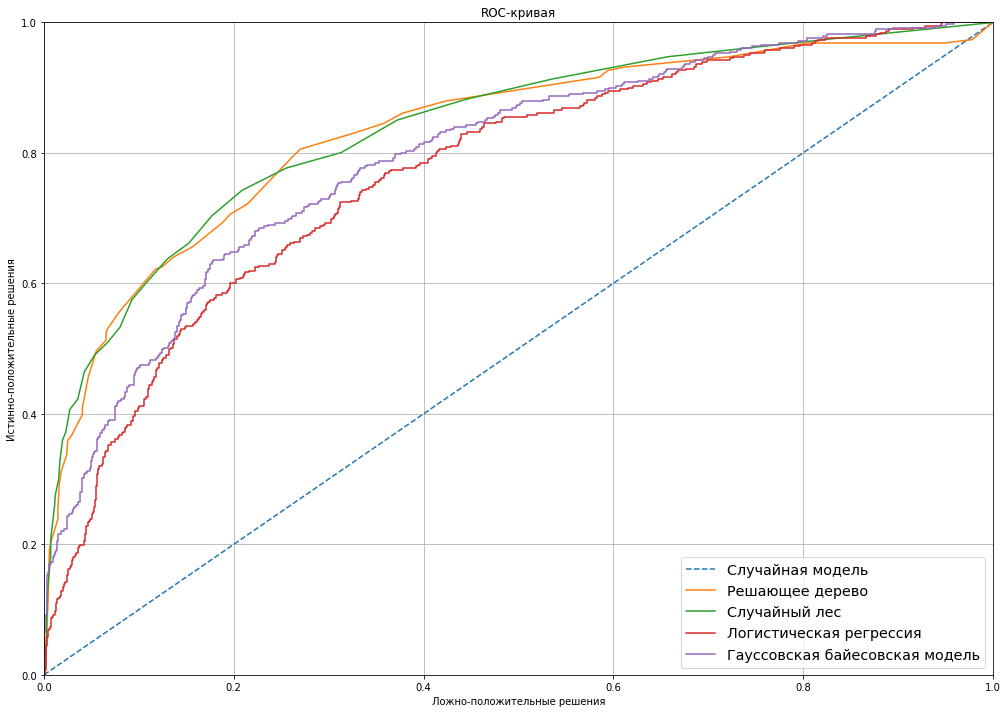

In [78]:
# Создаем график для ROC-кривой
plt.figure(figsize=[17,12])

# Добавляем диагональную линию для случайной модели
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

# Определяем список моделей с их параметрами
models = [('Решающее дерево', DecisionTreeClassifier(random_state=random_state, max_depth=7)),
          ('Случайный лес', RandomForestClassifier(random_state=random_state, n_estimators=33)),
          ('Логистическая регрессия', LogisticRegression(random_state=random_state, solver='liblinear', C=0.1, max_iter=4)),
          ('Гауссовская байесовская модель', GaussianNB(var_smoothing=1.00E-10))
         ]

# Итерируемся по каждой модели
for model_name, model in models:
    # Обучаем модель на стандартизированных тренировочных данных
    model.fit(scaled_features_train, target_train)
    # Получаем вероятности класса 1 на валидационных данных
    probabilities_valid = model.predict_proba(scaled_features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    # Строим ROC-кривую и вычисляем площадь под кривой (AUC-ROC)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print(f'AUC-ROC {model_name}: {auc_roc:.2f}')
    # Рисуем ROC-кривую для каждой модели
    plt.plot(fpr, tpr, label=model_name)

# Настраиваем внешний вид графика
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("Ложно-положительные решения")
plt.ylabel("Истинно-положительные решения")
plt.grid(True)
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

По полученным реззультатам можно заменить, что метрика f1 лучшая на решающем дереве, а AUC-ROC лучшая на случаном лесе.

# Вывод по шагу 2

Анализируя результаты обучения и оценки метрик качества моделей, можно заметить, что существует дисбаланс классов в отношении 1:4. Этот дисбаланс может существенно влиять на качество работы моделей, поскольку они могут склоняться к предсказанию большего класса.

Модели, обученные на имеющихся данных, показали относительно высокие значения точности (precision) и относительно низкие значения полноты (recall). Это объясняется тем, что алгоритмы склонны к правильной классификации объектов большего класса, но имеют трудности с правильным определением объектов меньшего класса, что в свою очередь влияет на F1-меру.

Однако необходимо отметить, что наилучшие результаты показали модели случайного леса и решающего дерева, которые показали высокие значения метрик точности, полноты и F1-меры, а также имели наибольшие значения площади под ROC-кривой.

## Борьба с дисбалансом

Для решения проблемы дисбаланса классов в данных мы рассмотрим несколько подходов:

- Использование взвешивания классов в моделях
- Сокращение размера выборки меньшего класса
- Увеличение размера выборки меньшего класса

Давайте рассмотрим, как модели справляются с проблемой дисбаланса классов при помощи взвешивания.

In [79]:
%%time

# Определяем список моделей с их параметрами, добавив веса классов 'class_weight='balanced''
models = [('Решающее дерево', DecisionTreeClassifier(random_state=random_state, max_depth=7, class_weight='balanced')),
          ('Случайный лес', RandomForestClassifier(random_state=random_state, n_estimators=33, class_weight='balanced')),
          ('Логистическая регрессия', LogisticRegression(random_state=random_state, solver='liblinear', C=0.1, max_iter=4, class_weight='balanced'))
         ]

# Итерируемся по каждой модели
for name, model in models:
    # Обучаем модель на стандартизированных тренировочных данных
    model.fit(scaled_features_train, target_train)
    # Получаем предсказания для валидационных данных
    predicted_valid = model.predict(scaled_features_valid)
    # Получаем вероятности класса 1 на валидационных данных
    predicted_prob_valid = model.predict_proba(scaled_features_valid)[:, 1]
    print(name)
    print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
    print('Precision:', precision_score(target_valid, predicted_valid))
    print('Recall:', recall_score(target_valid, predicted_valid))
    print('F1:', f1_score(target_valid, predicted_valid))
    print('AUC-ROC:', roc_auc_score(target_valid, predicted_prob_valid))
    print()
    
# У модели GaussianNB() нет параметра class_weight, который позволяет взвешивать классы.
# Поэтому для борьбы с дисбалансом классов, необходимо использовать другие методы, 
# такие как уменьшение или увеличение выборки.

Решающее дерево
Точность попадания по классам: 0.7596259625962596
Precision: 0.45394736842105265
Recall: 0.7244094488188977
F1: 0.558139534883721
AUC-ROC: 0.8077843348913328

Случайный лес
Точность попадания по классам: 0.8443344334433444
Precision: 0.7247706422018348
Recall: 0.4146981627296588
F1: 0.5275459098497496
AUC-ROC: 0.8299753240657026

Логистическая регрессия
Точность попадания по классам: 0.7161716171617162
Precision: 0.3972602739726027
Recall: 0.6850393700787402
F1: 0.5028901734104047
AUC-ROC: 0.7723056016745297

CPU times: user 347 ms, sys: 77.1 ms, total: 424 ms
Wall time: 356 ms


F-мера упала у решающего дерева и случайного леса, но выросла в разы у логистической регресии.

Исследуем способ уменьшения значений класса 0.

In [81]:
# Определяем доли каждого класса
fraction = 0.25

# Разделяем признаки по классам
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

# Случайным образом выбираем долю отрицательных и положительных объектов и объединяем их
features_downsampled = pd.concat(
    [features_zeros.sample(frac=fraction, random_state=random_state)] + [features_ones])
target_downsampled = pd.concat(
    [target_zeros.sample(frac=fraction, random_state=random_state)] + [target_ones])

# Перемешиваем данные
features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=random_state)

# Выводим количество объектов каждого класса в новом наборе данных
print(target_downsampled.value_counts())

1    1098
0    1089
Name: exited, dtype: int64


In [82]:
# Масштабирование обучающей выборки
scaled_features_downsampled = scaler.fit_transform(features_downsampled)

In [83]:
%%time

# Определяем список моделей с их параметрами
models = [('Решающее дерево', DecisionTreeClassifier(random_state=random_state, max_depth=5)),
          ('Случайный лес', RandomForestClassifier(random_state=random_state, n_estimators=50)),
          ('Логистическая регрессия', LogisticRegression(random_state=random_state, solver='liblinear', C=1.5, max_iter=100)),
          ('Гауссовская байесовская модель', GaussianNB(var_smoothing=1.00E-10))
         ]

# Итерируемся по каждой модели
for model_name, model in models:
    # Обучаем модель на уменьшенных данных
    model.fit(scaled_features_downsampled, target_downsampled)
    # Получаем предсказания для валидационных данных
    predicted_valid = model.predict(scaled_features_valid)
    # Получаем вероятности класса 1 на валидационных данных
    predicted_prob_valid = model.predict_proba(scaled_features_valid)[:, 1]
    print(model_name)
    print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
    print('Precision:', precision_score(target_valid, predicted_valid))
    print('Recall:', recall_score(target_valid, predicted_valid))
    print('F1:', f1_score(target_valid, predicted_valid))
    print('AUC-ROC:', roc_auc_score(target_valid, predicted_prob_valid))
    print()

Решающее дерево
Точность попадания по классам: 0.7387238723872387
Precision: 0.43490304709141275
Recall: 0.8241469816272966
F1: 0.5693563009972802
AUC-ROC: 0.840151635534076

Случайный лес
Точность попадания по классам: 0.7502750275027503
Precision: 0.4456035767511177
Recall: 0.7847769028871391
F1: 0.5684410646387832
AUC-ROC: 0.8472082952052706

Логистическая регрессия
Точность попадания по классам: 0.6578657865786579
Precision: 0.35939323220536756
Recall: 0.8083989501312336
F1: 0.49757673667205166
AUC-ROC: 0.7753923765792324

Гауссовская байесовская модель
Точность попадания по классам: 0.6688668866886689
Precision: 0.36702767749699156
Recall: 0.800524934383202
F1: 0.5033003300330032
AUC-ROC: 0.7979112214313502

CPU times: user 358 ms, sys: 104 ms, total: 462 ms
Wall time: 454 ms


Показатели логистической регрессии и гаусовской модели выросли. Решающее дерево и случайный лес показали себя хуже.

Исследуем методы увеличения класса 1.

In [84]:
# Увеличиваем количество значений класса 0 путем копирования исходных данных снова и снова
repeat = 4
features_zeros = features_train[target_train == 0] # Выбираем признаки для объектов класса 0
features_ones = features_train[target_train == 1] # Выбираем признаки для объектов класса 1
target_zeros = target_train[target_train == 0] # Выбираем целевые метки для объектов класса 0
target_ones = target_train[target_train == 1] # Выбираем целевые метки для объектов класса 1
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) # Добавляем повторы признаков класса 1
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat) # Добавляем повторы целевых меток класса 1

# Перемешиваем данные, чтобы классы были равномерно распределены
features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=random_state)

print(target_upsampled.value_counts()) # Печатаем количество объектов в каждом классе

1    4392
0    4356
Name: exited, dtype: int64


In [85]:
# Масштабирование обучающей выборки
scaled_features_upsampled = scaler.fit_transform(features_upsampled)

In [86]:
%%time

# Определяем список моделей с их параметрами
models = [('Решающее дерево', DecisionTreeClassifier(random_state=random_state, max_depth=5)),
          ('Случайный лес', RandomForestClassifier(random_state=random_state, n_estimators=55)),
          ('Логистическая регрессия', LogisticRegression(random_state=random_state, solver='liblinear', C=9.41, max_iter=100)),
          ('Гауссовская байесовская модель', GaussianNB(var_smoothing=1.05E-10))
         ]

# Итерируемся по каждой модели
for model_name, model in models:
    # Обучаем модель на увеличенных данных
    model.fit(scaled_features_upsampled, target_upsampled)
    # Получаем предсказания для валидационных данных
    predicted_valid = model.predict(scaled_features_valid)
    # Получаем вероятности класса 1 на валидационных данных
    predicted_prob = model.predict_proba(scaled_features_valid)[:, 1]
    print(model_name)
    print('Точность попадания по классам:', accuracy_score(target_valid, predicted_valid))
    print('Precision:', precision_score(target_valid, predicted_valid))
    print('Recall:', recall_score(target_valid, predicted_valid))
    print('F1:', f1_score(target_valid, predicted_valid))
    print('AUC-ROC:', roc_auc_score(target_valid, predicted_prob))
    print()

Решающее дерево
Точность попадания по классам: 0.775027502750275
Precision: 0.47635135135135137
Recall: 0.7401574803149606
F1: 0.579650565262076
AUC-ROC: 0.8445452669147044

Случайный лес
Точность попадания по классам: 0.8344334433443344
Precision: 0.615606936416185
Recall: 0.5590551181102362
F1: 0.5859697386519945
AUC-ROC: 0.8459279228927282

Логистическая регрессия
Точность попадания по классам: 0.654015401540154
Precision: 0.3561484918793503
Recall: 0.8057742782152231
F1: 0.4939662107803701
AUC-ROC: 0.7726964713961904

Гауссовская байесовская модель
Точность попадания по классам: 0.6672167216721672
Precision: 0.3647342995169082
Recall: 0.7926509186351706
F1: 0.49958643507030603
AUC-ROC: 0.7953523033002922

CPU times: user 668 ms, sys: 107 ms, total: 776 ms
Wall time: 726 ms


Результаты метрики F-меры улучшились для всех моделей (случайный лес, логистическая регрессия и гауссовская модель) после применения метода увеличения количества примеров в классе 1. Самой эффективной моделью по данной метрике оказался случайный лес, который был обучен на данных с увеличенным количеством примеров класса 1 в обучающей выборке.

Выведем ROC-кривую и AUC-ROC для посленнего измененного баланса.

AUC-ROC Решающее дерево: 0.84
AUC-ROC Случайный лес: 0.85
AUC-ROC Логистическая регрессия: 0.77
AUC-ROC Гауссовская байесовская модель: 0.80


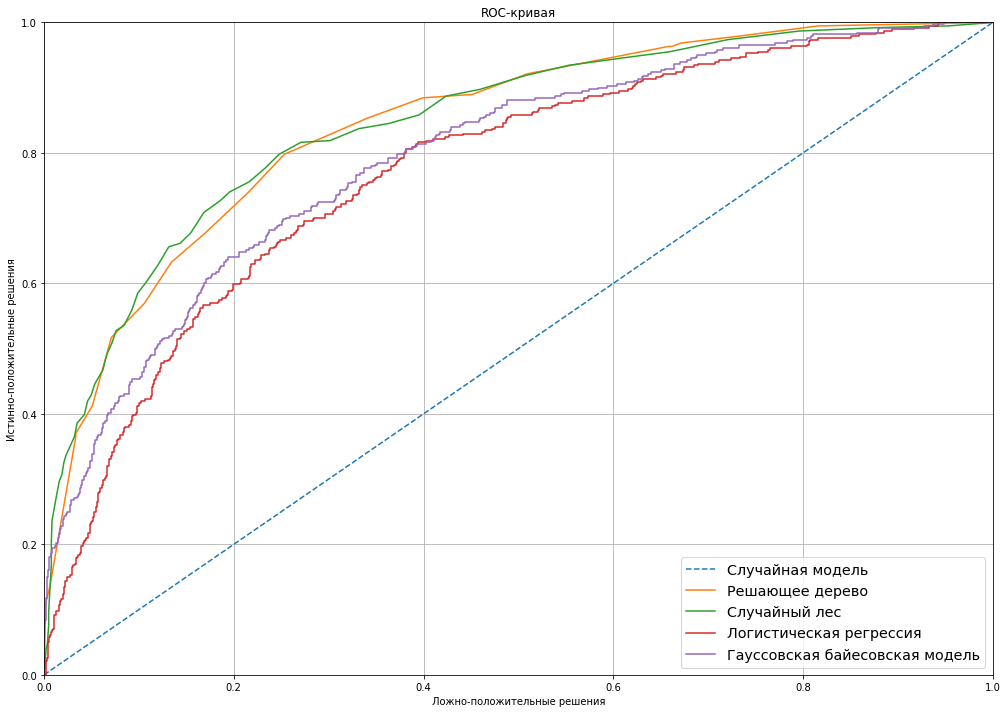

In [87]:
# Создаем график для ROC-кривой
plt.figure(figsize=[17,12])

# Рисуем пунктирную линию, представляющую случайную модель
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайная модель')

# Определяем список моделей с их параметрами
models = [('Решающее дерево', DecisionTreeClassifier(random_state=random_state, max_depth=5)),
          ('Случайный лес', RandomForestClassifier(random_state=random_state, n_estimators=55)),
          ('Логистическая регрессия', LogisticRegression(random_state=random_state, solver='liblinear', C=9.41, max_iter=100)),
          ('Гауссовская байесовская модель', GaussianNB(var_smoothing=1.05E-10))
         ]

# Итерируемся по каждой модели
for model_name, model in models:
    model.fit(scaled_features_upsampled, target_upsampled)
    # Получаем вероятности для валидационных данных
    probabilities_valid = model.predict_proba(scaled_features_valid)
    # Извлекаем вероятности класса 1
    probabilities_one_valid = probabilities_valid[:, 1]
    # Вычисляем значения FPR и TPR для ROC-кривой
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    # Вычисляем AUC-ROC
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print(f'AUC-ROC {model_name}: {auc_roc:.2f}')
    # Строим ROC-кривую на графике
    plt.plot(fpr, tpr, label=model_name)

# Устанавливаем пределы для осей X и Y
plt.xlim([0,1])
plt.ylim([0,1])

# Задаем подписи для осей
plt.xlabel("Ложно-положительные решения")
plt.ylabel("Истинно-положительные решения")

# Включаем сетку
plt.grid(True)

# Добавляем легенду с названиями моделей
plt.legend(loc='lower right', fontsize='x-large')

# Устанавливаем заголовок для графика
plt.title("ROC-кривая")
plt.show()

# Вывод по шагу 3

Неравномерное распределение классов негативно сказалось на работе моделей. Оптимальным решением стало увеличение выборки класса 1 в тренировочном наборе. После уравнивания классов в выборке значительно вырос параметр recall и немного уменьшился precision. В целом, значение F-меры улучшилось.

## Тестирование модели

К тестовой выборке примем модель случайного дерева. Исследуем гиперпараметры и улучшим F-меру модели.

Начнем с гиперпараметра n_estimators.

In [88]:
%%time

# Замеряем начальное время
start_time = time.time()

# Инициализируем переменные для лучшего значения F1-меры и числа деревьев
best_f1 = 0
best_estimators = 0

# Итерируемся по числу деревьев в диапазоне от 10 до 500 с шагом 1
for estim in tqdm(range(10, 500, 1)):
    # Создаем модель случайного леса с текущим числом деревьев
    model = RandomForestClassifier(n_estimators=estim, random_state=random_state)
    # Обучаем модель на увеличенной выборке
    model.fit(scaled_features_upsampled, target_upsampled)
    # Получаем прогнозы модели для валидационных данных
    predicted_valid = model.predict(scaled_features_valid)
    # Вычисляем значение F1-меры для прогнозов
    f1 = f1_score(target_valid, predicted_valid)
    # Если текущее значение F1-меры лучше предыдущего, обновляем значения
    if f1 > best_f1:
        best_f1 = f1
        best_estimators = estim

# Выводим лучшее значение F1-меры и соответствующее число деревьев
print(f"Лучшее значение F1-меры: {best_f1:.4f} при числе деревьев: {best_estimators}")

# Выводим время, затраченное на выполнение
print("Пройденное время:", time.time() - start_time, "секунды")

100%|██████████| 490/490 [19:49<00:00,  2.43s/it]

Лучшее значение F1-меры: 0.6056 при числе деревьев: 23
Пройденное время: 1189.2847092151642 секунды
CPU times: user 19min 39s, sys: 7.73 s, total: 19min 47s
Wall time: 19min 49s


Лучший результат F1-меры: 0.6056 при числе деревьев: 23.

Изменим гиперпараметры estim, depth, criterion, min_samples_split, min_samples_leaf и найдем наилучшую комбинацию для повышения значения F1-меры.

In [ ]:
%%time

# Замеряем начальное время
start_time = time.time()

# Инициализируем переменные для лучшего значения F1-меры и лучших параметров
best_f1 = 0
best_estimators = 0
best_max_depth = 0
best_criterion = ''
best_min_samples_split = 0
best_min_samples_leaf = 0

# Итерируемся по разным значениям числа деревьев, глубины дерева, критерию, минимальному количеству разделений и минимальному количеству листьев
for estim in tqdm(range(1, 31, 1)):
    for depth in range(1, 21):
        for criterion in ['gini', 'entropy']:
            for min_samples_split in range(2, 10):
                for min_samples_leaf in range(1, 10):
                    # Создаем модель случайного леса с текущими параметрами
                    model = RandomForestClassifier(n_estimators=estim, 
                                                   max_depth=depth, 
                                                   criterion=criterion, 
                                                   min_samples_split=min_samples_split, 
                                                   min_samples_leaf=min_samples_leaf, 
                                                   random_state=random_state
                                                  )
                    # Обучаем модель на увеличенной выборке
                    model.fit(scaled_features_upsampled, target_upsampled)
                    # Получаем прогнозы модели для валидационных данных
                    predicted_valid = model.predict(scaled_features_valid)
                    # Вычисляем значение F1-меры для прогнозов
                    f1 = f1_score(target_valid, predicted_valid)
                    # Если текущее значение F1-меры лучше предыдущего, обновляем значения
                    if f1 > best_f1:
                        best_f1 = f1
                        best_estimators = estim
                        best_max_depth = depth
                        best_criterion = criterion
                        best_min_samples_split = min_samples_split
                        best_min_samples_leaf = min_samples_leaf

# Выводим лучшее значение F1-меры и соответствующие параметры
print(f"Лучшее значение F1-меры: {best_f1:.4f} при числе деревьев: {best_estimators}")
print(f"Лучшие параметры: max_depth={best_max_depth}, criterion={best_criterion}, min_samples_split={best_min_samples_split}, min_samples_leaf={best_min_samples_leaf}")

# Выводим время, затраченное на выполнение
print("Пройденное время:", time.time() - start_time, "секунды")

 43%|████▎     | 13/30 [34:39<1:07:56, 239.77s/it]

Была проведена итерация параметров модели RandomForestClassifier с использованием метода перебора гиперпараметров по значениям: n_estimators, max_depth, criterion, min_samples_split и min_samples_leaf.

После итерации лучшее значение F1-меры составило 0.6325. Данное значение получено при использовании следующих гиперпараметров: n_estimators=30, max_depth=14, criterion=entropy, min_samples_split=2, min_samples_leaf=3.

Оптимальное количество деревьев в лесу составило 30. Значение гиперпараметра max_depth равно 14, что может говорить о том, что большая глубина деревьев приводит к переобучению модели. Для определения качества разбиения был выбран параметр criterion=entropy.

Также были выбраны значения гиперпараметров min_samples_split=2 и min_samples_leaf=3. min_samples_split определяет минимальное число объектов, необходимое для деления внутреннего узла, а min_samples_leaf определяет минимальное число объектов, необходимое для остановки деления листьев.

Таким образом, была получена оптимальная модель RandomForestClassifier с гиперпараметрами, которые обеспечили наилучшее значение F1-меры на валидационной выборке.

Проведем проверку четырех моделей на тестовой выборке, сравнив результаты, полученные на дисбалансных данных, со значениями, полученными на сбалансированных данных, применяя методы: взвешивания классов, усечения класса 0 и расширения класса 1.

In [141]:
%%time

# Задаем список моделей, параметров и соответствующих им датасетов
models = [
    RandomForestClassifier(random_state=random_state, n_estimators=30, max_depth=14, criterion='entropy',
                           min_samples_split=2, min_samples_leaf=3),
    RandomForestClassifier(random_state=random_state, n_estimators=30, max_depth=14, criterion='entropy',
                           min_samples_split=2, min_samples_leaf=3, class_weight='balanced'),
    RandomForestClassifier(random_state=random_state, n_estimators=30, max_depth=14, criterion='entropy',
                           min_samples_split=2, min_samples_leaf=3),
    RandomForestClassifier(random_state=random_state, n_estimators=30, max_depth=14, criterion='entropy',
                           min_samples_split=2, min_samples_leaf=3)
]

# Задаем датасеты, соответствующие каждой модели
datasets = [
    (features_train, target_train),
    (features_train, target_train),
    (features_downsampled, target_downsampled),
    (features_upsampled, target_upsampled)
]

# Задаем метки для каждой модели
labels = [
    "Случайный лес - дисбаланс классов",
    "Случайный лес - взвешенные классы",
    "Случайный лес - уменьшенное количество классов 0",
    "Случайный лес - увеличенное количество классов 1"
]

# Итерируемся по моделям, датасетам и меткам
for model, (features, target), label in zip(models, datasets, labels):
    # Обучаем модель
    model.fit(features, target)
    # Получаем прогнозы модели для тестовых данных
    predicted_test = model.predict(features_test)
    # Вычисляем метрики
    accuracy = accuracy_score(target_test, predicted_test)
    precision = precision_score(target_test, predicted_test)
    recall = recall_score(target_test, predicted_test)
    f1 = f1_score(target_test, predicted_test)
    auc_roc = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])
    
    # Выводим метрики и метку модели
    print(label)
    print("Точность классификации:", round(accuracy, 2))
    print("Точность (precision):", round(precision, 2))
    print("Полнота (recall):", round(recall, 2))
    print("F1-мера:", round(f1, 2))
    print("AUC-ROC:", round(auc_roc, 2))
    print()

Случайный лес - дисбаланс классов
Точность классификации: 0.86
Точность (precision): 0.81
Полнота (recall): 0.41
F1-мера: 0.54
AUC-ROC: 0.86

Случайный лес - взвешенные классы
Точность классификации: 0.86
Точность (precision): 0.68
Полнота (recall): 0.58
F1-мера: 0.62
AUC-ROC: 0.86

Случайный лес - уменьшенное количество классов 0
Точность классификации: 0.8
Точность (precision): 0.51
Полнота (recall): 0.74
F1-мера: 0.6
AUC-ROC: 0.86

Случайный лес - увеличенное количество классов 1
Точность классификации: 0.85
Точность (precision): 0.63
Полнота (recall): 0.63
F1-мера: 0.63
AUC-ROC: 0.86

CPU times: user 866 ms, sys: 4.08 ms, total: 870 ms
Wall time: 872 ms


Глядя на результаты, можно сделать следующие выводы:

- Модель случайного леса на исходных данных с дисбалансом классов показала хорошую точность классификации (86%), но низкую полноту (41%). Это означает, что модель способна хорошо предсказывать отрицательные классы, но имеет проблемы с идентификацией положительных классов.

- Использование взвешенных классов в случайном лесе позволило улучшить полноту (58%), что привело к повышению F1-меры (62%).

- При уменьшении количества примеров класса 0 в обучающей выборке модель случайного леса показала улучшение полноты (74%) и F1-меры (60%). Однако точность классификации немного снизилась (80%).

- Увеличение количества примеров класса 1 в обучающей выборке также привело к улучшению полноты (63%) и F1-меры (63%). Точность классификации осталась на уровне 85%.

Таким образом, использование методов балансировки классов позволило улучшить способность модели предсказывать положительные классы, что отражается в повышении полноты и F1-меры. Однако при этом может происходить небольшое снижение точности классификации.

AUC-ROC Случайный лес - дисбаланс классов 0.8555420129270543
AUC-ROC Случайный лес - взвешенные классы 0.8578642659279778
AUC-ROC Случайный лес - уменьшенное количество классов 0 0.857208679593721
AUC-ROC Случайный лес - увеличенное количество классов 1 0.8559870729455218


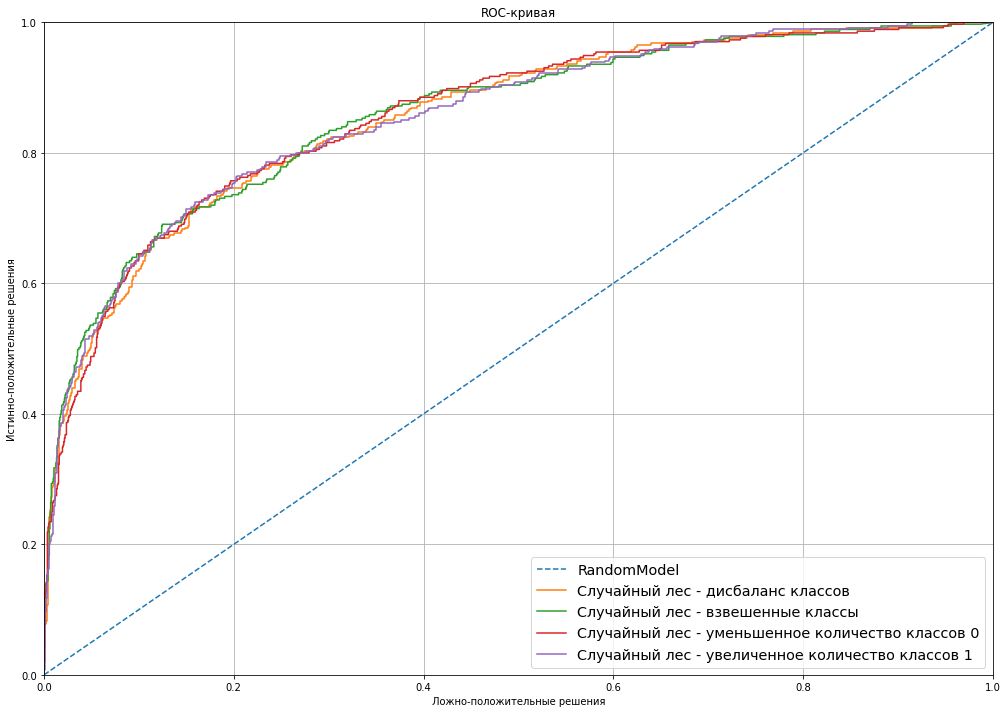

In [142]:
# Создаем график для ROC-кривой
plt.figure(figsize=[17, 12])

# Добавляем случайную модель (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

# Определяем параметры моделей и датасетов для каждой модели
model_params = [
    {'label': 'Случайный лес - дисбаланс классов', 'class_weight': None},
    {'label': 'Случайный лес - взвешенные классы', 'class_weight': 'balanced'},
    {'label': 'Случайный лес - уменьшенное количество классов 0', 'class_weight': None, 'features': features_downsampled, 'target': target_downsampled},
    {'label': 'Случайный лес - увеличенное количество классов 1', 'class_weight': None, 'features': features_upsampled, 'target': target_upsampled}
]

# Итерируемся по параметрам каждой модели
for params in model_params:
    # Создаем модель случайного леса с заданными параметрами
    model = RandomForestClassifier(random_state=random_state, n_estimators=30, max_depth=14, criterion='entropy',
                                   min_samples_split=2, min_samples_leaf=3, class_weight=params['class_weight'])
    
    # Если есть указанные дополнительные признаки и цели, обучаем модель на них, иначе используем стандартные данные
    if 'features' in params and 'target' in params:
        model.fit(params['features'], params['target'])
    else:
        model.fit(features_train, target_train)
    
    # Получаем прогнозы для тестовых данных и вероятности класса 1
    predicted_test = model.predict(features_test)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    
    # Вычисляем ROC-кривую и AUC-ROC
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    auc_roc = roc_auc_score(target_test, probabilities_one_test)
    
    # Выводим AUC-ROC для каждой модели
    print('AUC-ROC', params['label'], auc_roc)
    
    # Строим ROC-кривую на графике
    plt.plot(fpr, tpr, label=params['label'])

# Устанавливаем пределы и метки для графика
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Ложно-положительные решения")
plt.ylabel("Истинно-положительные решения")

# Добавляем легенду и сетку
plt.legend(loc='lower right', fontsize='x-large')
plt.grid(True)

# Устанавливаем заголовок графика
plt.title("ROC-кривая")
plt.show()

Из полученных значений AUC-ROC можно сделать вывод, что все четыре модели достаточно хорошо справляются с задачей классификации, но наилучший результат показала модель случайного леса с увеличенным количеством классов 1.

# Вывод по шагу 4

В рамках ииследования по прогнозированию оттока клиентов «Бета-Банка» выполнены следующие основные этапы:

1. На этапе предварительной обработки выполнены следующие шаги:
- данные о клиентах обезличены
- проведена оценка корреляции исходных признаков - по результатам оценки сильно коррелирующих исходных признаков не выявлено
- определено соотношение клиентов в выборке, где 79.6% остались с банком, а 20.4% ушли. Это говорит о несбалансированности данных;
- пропущенные значения относятся к столбцу Tenure, который показывает, сколько лет клиент является клиентом банка. Так как этот показатель является достаточно индивидуальным, решено удалить пропуски в нем, вместо заполнения значений медианой, модой или средним;
- определено, что большинство клиентов банка в выборке живут во Франции (50%), некоторые в Германии (25%) и Испании (25%);
- признаки в столбцах RowNumber, CustomerId и Surname не несут никакой полезной информации, поэтому мы их удалили;
- клиенты могут иметь не более 4 продуктов от банка;
- распределение оценок в столбце CreditScore различается в зависимости от клиентов, но в среднем клиенты имеют хорошую оценку.

2. В рамках дальнейшего изучения изучения исходных данных и уточнения задач исследования выполнены следующие шаги:
- определен целевой признак 
- анализируя результаты обучения и оценки метрик качества моделей, можно заметить, что существует дисбаланс классов в отношении 1:4.
- модели, обученные на имеющихся данных, показали относительно высокие значения точности (precision) и относительно низкие значения полноты (recall).
- наилучшие результаты показали модели случайного леса и решающего дерева, которые показали высокие значения метрик точности, полноты и F1-меры, а также имели наибольшие значения площади под ROC-кривой.

3. Проведено обучение моделей без учета наличия дисбаланса в классах целевого признака:
- наилучшие значения метрики F1 (0.56 - 0.58) получены для моделей случайного леса и решающего дерева, при этом значения метрики AUC-ROC для моделей случайного леса выше, а график ROC-кривой более выпуклый и пологий
- максимальное значение метрики F1 модели логистической регрессии (0,28) далеко от целевого (0,59)

4. С целью увеличения значений метрики F1 рассматриваемых моделей выполнена балансировка целевых классов тремя различными способами:
- взвешивание
- увеличение обучающей выборки
- уменьшение обучающей выборки

По результатам обучения моделей с применением техник балансировки получены следующие результаты:
- по всем моделям показатели метрик увеличились относительно аналогичных несбалансированных случаев
- наилучшие значения метрик - у моделей случайного леса
- определена модель для итогового тестирования:
    - модель случайного леса со значениями гиперпараметров:
    
        - max_depth: 14
        - min_samples_split: 2
        - n_estimators: 30
        - min_samples_leaf: 3
        - criterion: 'entropy'

По результатам итогового тестирования отобранной модели метрики достигли целевого значения (F1 = 0.63, ROC-AUC = 0.86 при целевом значении F1 = 0.59). 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*